## Example plots with the IPython notebook
So I just use the lhapdf library for loading the PDFs and plot them

## 1. Imports and defs
Here are couple of modules that I usually load. The important one if lhapdf of course. Note the path to the python lhapdf library has to be added via the sys.path.append command

In [1]:
import os
import sys
#import lhapdf
import glob
import numpy as np
from math import *
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import integrate

print(scipy.__version__)

1.15.3


Here I am loading pylab for the plotting with the `inline` mode which forces it to render the plots inside the notebook

In [2]:
%matplotlib inline

In [3]:
#@title  load  stored PDFs

input= np.array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 6.07860077e-01,  5.61106422e-01,  5.17293191e-01,
         4.76267679e-01,  4.37790933e-01,  4.01865057e-01,
         3.68159910e-01,  3.36761960e-01,  3.07320314e-01,
         2.79925648e-01,  2.54246546e-01,  2.30333772e-01,
         2.08010635e-01,  1.87213509e-01,  1.67797965e-01,
         1.49697916e-01,  1.32832330e-01,  1.17114981e-01,
         1.02510837e-01,  8.89326026e-02,  7.63892399e-02,
         6.48175071e-02,  5.42547136e-02,  4.46813716e-02,
         3.61349061e-02,  2.86189986e-02,  2.21216417e-02,
         1.66592383e-02,  1.21650074e-02,  8.57126991e-03,
         5.79687950e-03,  3.72528015e-03,  2.24426932e-03,
         1.24182781e-03,  6.07533878e-04,  2.47182177e-04,
         7.39660341e-05,  1.20080439e-05,  3.34648632e-07,
        -1.76246040e-25],
       [ 1.27480022e+00,  1.19093415e+00,  1.11163689e+00,
         1.03668116e+00,  9.65691904e-01,  8.98696234e-01,
         8.35153351e-01,  7.75240284e-01,  7.18365781e-01,
         6.64708401e-01,  6.13670015e-01,  5.65404455e-01,
         5.19583010e-01,  4.76075472e-01,  4.34622336e-01,
         3.95101761e-01,  3.57359963e-01,  3.21237767e-01,
         2.86680771e-01,  2.53564368e-01,  2.21956129e-01,
         1.91841214e-01,  1.63415538e-01,  1.36829179e-01,
         1.12363855e-01,  9.02342879e-02,  7.06426366e-02,
         5.38038250e-02,  3.97088674e-02,  2.82795761e-02,
         1.93519319e-02,  1.26172492e-02,  7.74886081e-03,
         4.40440167e-03,  2.24014340e-03,  9.63817219e-04,
         3.13538907e-04,  5.87704262e-05,  3.02651847e-06,
         5.26232661e-25],
       [ 1.47560893e+00,  1.37755972e+00,  1.28521100e+00,
         1.19825960e+00,  1.11628208e+00,  1.03922152e+00,
         9.66509427e-01,  8.98245237e-01,  8.33824293e-01,
         7.73353082e-01,  7.16205779e-01,  6.62508823e-01,
         6.11896086e-01,  5.64187379e-01,  5.19094523e-01,
         4.76441524e-01,  4.36019640e-01,  3.97611187e-01,
         3.61080748e-01,  3.26217114e-01,  2.92977143e-01,
         2.61220941e-01,  2.30998084e-01,  2.02302477e-01,
         1.75241734e-01,  1.49855456e-01,  1.26188931e-01,
         1.04335624e-01,  8.42475207e-02,  6.59283441e-02,
         4.94544555e-02,  3.49549980e-02,  2.27235872e-02,
         1.31147520e-02,  6.37175658e-03,  2.39780845e-03,
         6.11598714e-04,  8.23088691e-05,  3.18917750e-06,
        -4.63643377e-24],
       [ 1.77619710e+00,  1.65678225e+00,  1.54475350e+00,
         1.43969418e+00,  1.34109907e+00,  1.24879163e+00,
         1.16215442e+00,  1.08117454e+00,  1.00520669e+00,
         9.34263827e-01,  8.67667432e-01,  8.05491146e-01,
         7.47313134e-01,  6.92870401e-01,  6.41819567e-01,
         5.93901466e-01,  5.48818839e-01,  5.06253634e-01,
         4.65946802e-01,  4.27561317e-01,  3.90893973e-01,
         3.55633857e-01,  3.21628059e-01,  2.88652051e-01,
         2.56544733e-01,  2.25031404e-01,  1.93834123e-01,
         1.62800514e-01,  1.32005963e-01,  1.02319593e-01,
         7.53766378e-02,  5.29314510e-02,  3.57651698e-02,
         2.32791342e-02,  1.39720672e-02,  6.54856229e-03,
         1.67678034e-03,  1.68762688e-04,  3.78745971e-06,
         7.47815410e-25],
       [ 1.77716471e+00,  1.65790379e+00,  1.54605270e+00,
         1.44119924e+00,  1.34283879e+00,  1.25080307e+00,
         1.16448199e+00,  1.08386433e+00,  1.00831471e+00,
         9.37862275e-01,  8.71820835e-01,  8.10291462e-01,
         7.52859006e-01,  6.99278130e-01,  6.49218466e-01,
         6.02439133e-01,  5.58657726e-01,  5.17567413e-01,
         4.78918544e-01,  4.42368212e-01,  4.07699750e-01,
         3.74570070e-01,  3.42790183e-01,  3.12099673e-01,
         2.82350860e-01,  2.53369483e-01,  2.25055239e-01,
         1.97377005e-01,  1.70046552e-01,  1.42447785e-01,
         1.13820797e-01,  8.39826708e-02,  5.46022210e-02,
         2.90800976e-02,  1.11660530e-02,  2.54899471e-03,
         4.40599943e-04,  6.64754948e-05,  3.07928689e-06,
        -1.98957845e-24],
       [ 3.70926410e+01,  3.44865132e+01,  3.20366177e+01,
         2.97345436e+01,  2.75693960e+01,  2.55389493e+01,
         2.36286591e+01,  2.18399775e+01,  2.01575755e+01,
         1.85835549e+01,  1.71019733e+01,  1.57168346e+01,
         1.44175026e+01,  1.31995585e+01,  1.20559335e+01,
         1.09820538e+01,  9.97238175e+00,  9.02072229e+00,
         8.12293837e+00,  7.27263681e+00,  6.46691451e+00,
         5.70097504e+00,  4.97396927e+00,  4.28547395e+00,
         3.63807632e+00,  3.03452399e+00,  2.48042478e+00,
         1.98154710e+00,  1.54249684e+00,  1.16585442e+00,
         8.52261334e-01,  5.98536272e-01,  3.99899063e-01,
         2.50301982e-01,  1.43002962e-01,  7.11885109e-02,
         2.83299210e-02,  7.37549970e-03,  6.41391393e-04,
         8.89282562e-23],
       [ 1.78951107e+00,  1.67177977e+00,  1.56164537e+00,
         1.45871652e+00,  1.36251019e+00,  1.27288735e+00,
         1.18926498e+00,  1.11166864e+00,  1.03949292e+00,
         9.72805778e-01,  9.10980210e-01,  8.54145562e-01,
         8.01940273e-01,  7.54180556e-01,  7.10590017e-01,
         6.70995111e-01,  6.35178166e-01,  6.02905830e-01,
         5.74004725e-01,  5.48189534e-01,  5.25322552e-01,
         5.05098744e-01,  4.87379050e-01,  4.71867690e-01,
         4.58348964e-01,  4.46471083e-01,  4.35734538e-01,
         4.25498628e-01,  4.14405163e-01,  4.00147655e-01,
         3.79566885e-01,  3.49157136e-01,  3.06626420e-01,
         2.51733049e-01,  1.87108207e-01,  1.19036930e-01,
         5.77457659e-02,  1.61752778e-02,  1.14556135e-03,
         2.02406859e-23],
       [ 1.79067661e+00,  1.67343332e+00,  1.56389224e+00,
         1.46167695e+00,  1.36634187e+00,  1.27776781e+00,
         1.19539544e+00,  1.11929246e+00,  1.04888881e+00,
         9.84304760e-01,  9.24966639e-01,  8.71052751e-01,
         8.22269289e-01,  7.78511761e-01,  7.39584760e-01,
         7.05415322e-01,  6.75895427e-01,  6.50911685e-01,
         6.30431735e-01,  6.14327608e-01,  6.02643507e-01,
         5.95251261e-01,  5.92210080e-01,  5.93336699e-01,
         5.98447629e-01,  6.07027233e-01,  6.18072741e-01,
         6.30280293e-01,  6.41571710e-01,  6.49344911e-01,
         6.50242514e-01,  6.38992749e-01,  6.07741413e-01,
         5.47194001e-01,  4.50818639e-01,  3.21806653e-01,
         1.81516754e-01,  6.69007568e-02,  8.84304257e-03,
         2.25460106e-21],
       [ 1.47560893e+00,  1.37755972e+00,  1.28521100e+00,
         1.19825960e+00,  1.11628208e+00,  1.03922152e+00,
         9.66509427e-01,  8.98245237e-01,  8.33824293e-01,
         7.73353082e-01,  7.16205779e-01,  6.62508823e-01,
         6.11896086e-01,  5.64187379e-01,  5.19094523e-01,
         4.76441524e-01,  4.36019640e-01,  3.97611187e-01,
         3.61080748e-01,  3.26217114e-01,  2.92977143e-01,
         2.61220941e-01,  2.30998084e-01,  2.02302477e-01,
         1.75241734e-01,  1.49855456e-01,  1.26188931e-01,
         1.04335624e-01,  8.42475207e-02,  6.59283441e-02,
         4.94544555e-02,  3.49549980e-02,  2.27235872e-02,
         1.31147520e-02,  6.37175658e-03,  2.39780845e-03,
         6.11598714e-04,  8.23088691e-05,  3.18917750e-06,
        -4.63643377e-24],
       [ 1.27480022e+00,  1.19093415e+00,  1.11163689e+00,
         1.03668116e+00,  9.65691904e-01,  8.98696234e-01,
         8.35153351e-01,  7.75240284e-01,  7.18365781e-01,
         6.64708401e-01,  6.13670015e-01,  5.65404455e-01,
         5.19583010e-01,  4.76075472e-01,  4.34622336e-01,
         3.95101761e-01,  3.57359963e-01,  3.21237767e-01,
         2.86680771e-01,  2.53564368e-01,  2.21956129e-01,
         1.91841214e-01,  1.63415538e-01,  1.36829179e-01,
         1.12363855e-01,  9.02342879e-02,  7.06426366e-02,
         5.38038250e-02,  3.97088674e-02,  2.82795761e-02,
         1.93519319e-02,  1.26172492e-02,  7.74886081e-03,
         4.40440167e-03,  2.24014340e-03,  9.63817219e-04,
         3.13538907e-04,  5.87704262e-05,  3.02651847e-06,
         5.26232661e-25],
       [ 6.07860077e-01,  5.61106422e-01,  5.17293191e-01,
         4.76267679e-01,  4.37790933e-01,  4.01865057e-01,
         3.68159910e-01,  3.36761960e-01,  3.07320314e-01,
         2.79925648e-01,  2.54246546e-01,  2.30333772e-01,
         2.08010635e-01,  1.87213509e-01,  1.67797965e-01,
         1.49697916e-01,  1.32832330e-01,  1.17114981e-01,
         1.02510837e-01,  8.89326026e-02,  7.63892399e-02,
         6.48175071e-02,  5.42547136e-02,  4.46813716e-02,
         3.61349061e-02,  2.86189986e-02,  2.21216417e-02,
         1.66592383e-02,  1.21650074e-02,  8.57126991e-03,
         5.79687950e-03,  3.72528015e-03,  2.24426932e-03,
         1.24182781e-03,  6.07533878e-04,  2.47182177e-04,
         7.39660341e-05,  1.20080439e-05,  3.34648632e-07,
        -1.76246040e-25],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00]])

In [4]:
# 13 Flavors, and 40 x points
#  Flavors = [tbar,bbar,cbar,sbar,ubar,dbar,gluon,down,up,strange,charm,botton,top]
np.shape(input)

(13, 40)

In [5]:
q0=10.
nx=40 # Do not change; this is matched to the stored data
xvalues = np.logspace(-4,0,nx)

In [6]:
xvalues

array([1.00000000e-04, 1.26638017e-04, 1.60371874e-04, 2.03091762e-04,
       2.57191381e-04, 3.25702066e-04, 4.12462638e-04, 5.22334507e-04,
       6.61474064e-04, 8.37677640e-04, 1.06081836e-03, 1.34339933e-03,
       1.70125428e-03, 2.15443469e-03, 2.72833338e-03, 3.45510729e-03,
       4.37547938e-03, 5.54102033e-03, 7.01703829e-03, 8.88623816e-03,
       1.12533558e-02, 1.42510267e-02, 1.80472177e-02, 2.28546386e-02,
       2.89426612e-02, 3.66524124e-02, 4.64158883e-02, 5.87801607e-02,
       7.44380301e-02, 9.42668455e-02, 1.19377664e-01, 1.51177507e-01,
       1.91448198e-01, 2.42446202e-01, 3.07029063e-01, 3.88815518e-01,
       4.92388263e-01, 6.23550734e-01, 7.89652287e-01, 1.00000000e+00])

## Note: input index runs from [0,12], while flavors runs from [-6,6]

In [7]:
def flavor(index):
    return index-6

{flavor(0),flavor(6),flavor(12)}

{-6, 0, 6}

In [8]:
def index(iflavor):
    return iflavor+6

{index(-6),index(0),index(6)}

{0, 6, 12}

## Make some plots

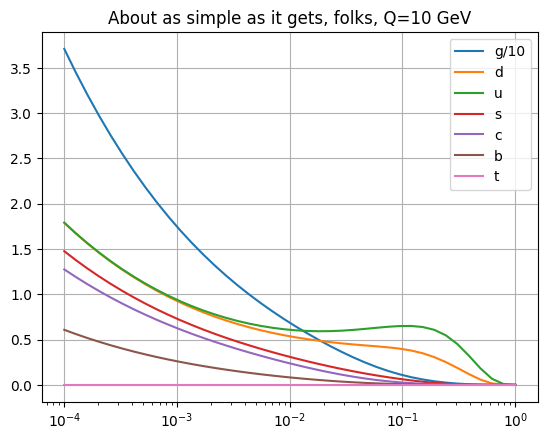

In [9]:
plt.plot(xvalues,input[index(0)]/10,label='g/10')
plt.plot(xvalues,input[index(1)],label='d')
plt.plot(xvalues,input[index(2)],label='u')
plt.plot(xvalues,input[index(3)],label='s')
plt.plot(xvalues,input[index(4)],label='c')
plt.plot(xvalues,input[index(5)],label='b')
plt.plot(xvalues,input[index(6)],label='t')
plt.xscale("log")

plt.title('About as simple as it gets, folks, Q=10 GeV')
plt.grid(True)
plt.savefig("test.pdf")

plt.xscale("log")
plt.legend()
plt.show()


## Let's Integrate

In [10]:
# Simpson's rule
# CAREFUL: WATCH THE ORDER:

In [11]:
from scipy import integrate
import numpy as np
x = np.arange(0, 10)
y = np.arange(0, 10)

In [12]:
integrate.simpson(y, x=x)

np.float64(40.5)

In [13]:
# Integrate the d quark
integrate.simpson(input[flavor(1)], x=xvalues)

np.float64(0.26102922905627746)

In [14]:
mom= np.zeros(13) # make an array w/ zeros
print(mom)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [15]:
mom= np.zeros(13) # make an array w/ zeros
#print(mom)

for i in range(13):
        # print(f"Outer loop: {i} ")
        mom[i]=integrate.simpson(input[i], x=xvalues)
        print(i, " = ",mom[i])



0  =  0.0
1  =  0.004307592073591233
2  =  0.012829015496319403
3  =  0.02188101237706331
4  =  0.03251606268456121
5  =  0.03838303583881359
6  =  0.44733716988117755
7  =  0.1332182728878462
8  =  0.26102922905627746
9  =  0.02188101237706331
10  =  0.012829015496319403
11  =  0.004307592073591233
12  =  0.0


In [16]:
# Check that all the momentum probability fractions sum to one
sum(mom)

np.float64(0.9905190102426239)